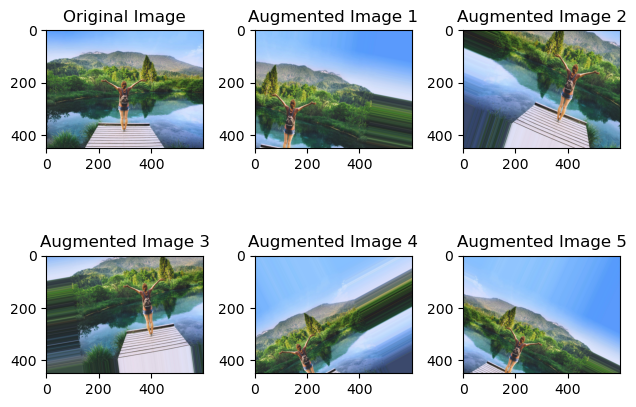

In [7]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Read an image
img = cv2.imread('nature.jpg')

# Check if the image is loaded successfully
if img is None:
    print("Error: Unable to load the image. Please check the file path.")
else:
    # Convert BGR to RGB
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    # Display the original image
    plt.subplot(2, 3, 1)
    plt.imshow(img)
    plt.title('Original Image')

    # Reshape the image to (1, height, width, channels) for the data generator
    img = np.expand_dims(img, axis=0)

    # Create an ImageDataGenerator with augmentation settings
    datagen = ImageDataGenerator(
        rotation_range=40,
        width_shift_range=0.4,
        height_shift_range=0.4,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest'
    )

    # Generate augmented images
    augmented_images = []

    # Generate and display augmented images
    for i, augmented_img in enumerate(datagen.flow(img, batch_size=1)):
        augmented_images.append(augmented_img[0].astype(np.uint8))
        plt.subplot(2, 3, i + 2)
        plt.imshow(augmented_img[0].astype(np.uint8))
        plt.title(f'Augmented Image {i + 1}')
        if i == 4:  # Display 4 augmented images
            break

    plt.tight_layout()
    plt.show()
